# DOMEO 4.0 - 
## Load the New DOME 4.0 core ontology, 
this is the first step, we need to go through the entier ontologies and consolidate into an eco system

currently: 

1. the ontology is a patch work, no coherency,
2. EurosciVoc is not used !


## Tasks:
1. load the `~/dev/ontology/dome/Ontology-matters/dome4.0_core.ttl`
   - Working forlder: `~/dev/ontology/ontology_manager`
3. 


In [1]:
from ontology_manager.ontology_utils import OntologyManager
from rdflib import Graph, URIRef, Namespace, Literal, BNode, collection
from rdflib.namespace import SKOS, RDF, RDFS, OWL

In [2]:
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph, rdflib_to_graphtool
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
from ontodot.ontodot import vis 
from ontodot.ontodot import OntoVis

In [4]:
from types import SimpleNamespace
import os

In [5]:
def printH(s):
    the_line = "=" * (len(s)+1)
    print(f"{s}:\n{the_line}")

In [6]:
def auto_bind_namespaces(g:Graph, prefixes_copy_paste_string):
    """
    prefixes_copy_paste_string is as the name suggestes a copy paste of the header in attl file with 
    the form: 
    @prefix dcat: <http://www.w3.org/ns/dcat#> .


    i.e, no additional comments... 
    and g is any Graph
    """
    split_to_lines = prefixes_copy_paste_string.strip().split("\n")
    for line in split_to_lines:
        the_parts = line.split()
        if the_parts[0] == "@prefix":
            prefix = the_parts[1].rstrip(":")
            uri = the_parts[2].lstrip("<").rstrip("> .")
            print(f"g.bind({prefix}, {Namespace(uri)})")
            g.bind(prefix, Namespace(uri))


In [7]:
dome=SimpleNamespace()

In [8]:
dome.g=Graph(bind_namespaces="rdflib")
dome.ns=Namespace('https://dome40.eu/semantics/dome4.0_core#')
dome.path = "/Users/adham/dev/dome/Ontology-matters/domeo"
dome.file='domeo.ttl'
dome.g.parse(os.path.join(dome.path, dome.file))
# we could add it to mio_manager manually actually, then use it as we want, 


<Graph identifier=N87690537250a44efa094ef5d45c4d05e (<class 'rdflib.graph.Graph'>)>

In [9]:

binds="""
@dome-core: <https://dome40.eu/semantics/dome4.0_core#> .
@prefix dcat: <http://www.w3.org/ns/dcat#> .
@prefix dcterms: <http://purl.org/dc/terms/> .
@prefix euroscivoc: <http://data.europa.eu/8mn/euroscivoc/> .
@prefix evmpo: <https://emmc.eu/semantics/evmpo/evmpo.ttl#> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix http-meth: <http://www.w3.org/2011/http-methods#> .
@prefix msm: <http://iserve.kmi.open.ac.uk/ns/msm#> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix skos: <http://www.w3.org/2004/02/skos/core#> .
@prefix xs: <http://www.w3.org/2001/XMLSchema#> .
"""
auto_bind_namespaces(dome.g, binds)

g.bind(dcat, http://www.w3.org/ns/dcat#)
g.bind(dcterms, http://purl.org/dc/terms/)
g.bind(euroscivoc, http://data.europa.eu/8mn/euroscivoc/)
g.bind(evmpo, https://emmc.eu/semantics/evmpo/evmpo.ttl#)
g.bind(foaf, http://xmlns.com/foaf/0.1/)
g.bind(http-meth, http://www.w3.org/2011/http-methods#)
g.bind(msm, http://iserve.kmi.open.ac.uk/ns/msm#)
g.bind(owl, http://www.w3.org/2002/07/owl#)
g.bind(rdf, http://www.w3.org/1999/02/22-rdf-syntax-ns#)
g.bind(rdfs, http://www.w3.org/2000/01/rdf-schema#)
g.bind(skos, http://www.w3.org/2004/02/skos/core#)
g.bind(xs, http://www.w3.org/2001/XMLSchema#)


# Issue: Unnamed, Blind Nodes! 
There is an issue with many "non standard, non web friendly" constructus inherited from other ontologies that are included. 

e.g., all the below terms cannot be used in any suitable technology. 

In [10]:
for s,p,o in dome.g:
    if not isinstance(s, URIRef):
        print (p.n3(dome.g.namespace_manager), o.n3(dome.g.namespace_manager))

owl:onProperty :value
rdf:type owl:Restriction
rdf:type owl:Restriction
owl:onProperty :uri
owl:someValuesFrom :Description
owl:someValuesFrom :IssuedDate
owl:someValuesFrom :License
owl:onProperty :has
owl:someValuesFrom :Title
rdf:type owl:Restriction
owl:qualifiedCardinality "2"^^xs:nonNegativeInteger
rdf:type owl:Restriction
owl:onClass :CUDS
owl:onProperty :hasPart
owl:someValuesFrom :keyword
rdf:type owl:Restriction
owl:onProperty :has
owl:onProperty :has
owl:someValuesFrom :CUDS
owl:onProperty :has
owl:someValuesFrom rdfs:Literal
owl:onProperty :hasPart
rdf:type owl:Restriction
owl:someValuesFrom :Publisher
rdf:type owl:Restriction
owl:onProperty :has
rdf:type owl:Restriction
owl:someValuesFrom xs:anyURI
rdf:type owl:Restriction
rdf:type owl:Restriction
owl:someValuesFrom :Creator
rdf:type owl:Restriction
owl:onProperty :has
owl:onProperty :string_value
owl:onProperty :has
rdf:type owl:Restriction
owl:someValuesFrom xs:string


# Needed Enhancements and consolidations. 
```
dome-core:has_service_type
  a owl:ObjectProperty ;
  rdfs:comment "Points to the service type (cf. 'action')"^^xs:string ;
  rdfs:comment "For example: View, Download, etc. "^^xs:string ;
  rdfs:comment "In DCAT, dct:type is used for this purpose. "^^xs:string ;
  rdfs:domain dome-core:service ;
  rdfs:range dome-core:action ;
  owl:propertyChainAxiom (dome-core:has_operation dome-core:has_operation_type) .
```
The above is one of many examples where constructus are hard to work with, and do not enable proper identification and provenance. 


# ISSUE: Lack of utilisation of EurosciVoc, https://op.europa.eu/en/web/eu-vocabularies/navigation and https://op.europa.eu/en/web/eu-vocabularies/ontologies etc. 


There is a need to streamline these ontologies.



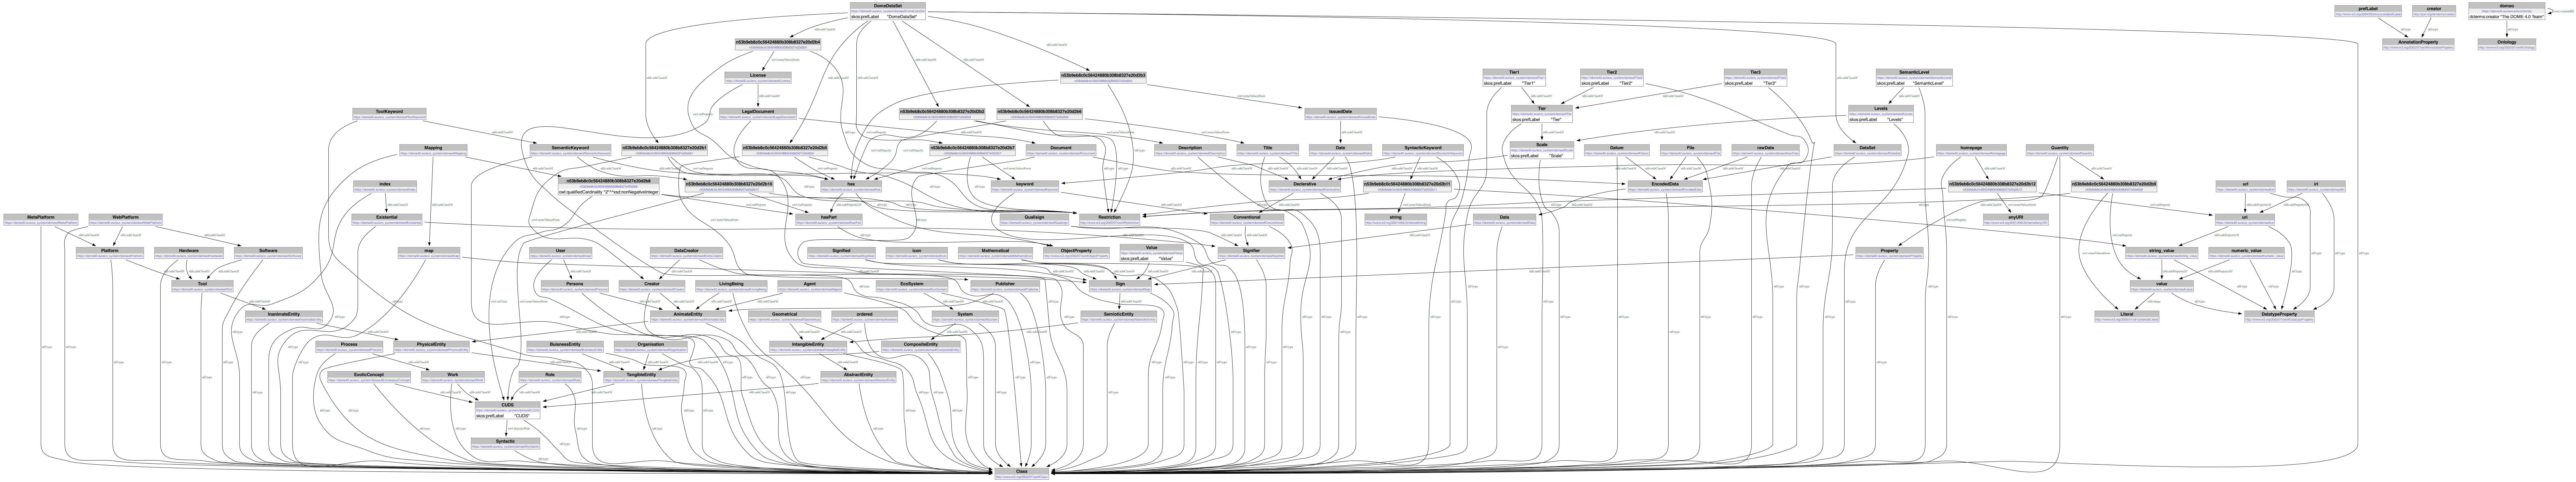

In [11]:
vis(dome.g, max_string_length=5) # Standard methods do not work with it! 

In [13]:
print(dome.g.serialize())

@prefix dcat: <http://www.w3.org/ns/dcat#> .
@prefix dcterms: <http://purl.org/dc/terms/> .
@prefix dome-core: <https://dome40.eu/semantics/dome4.0_core#> .
@prefix evmpo: <https://emmc.eu/semantics/evmpo/evmpo.ttl#> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix http-meth: <http://www.w3.org/2011/http-methods#> .
@prefix msm: <http://iserve.kmi.open.ac.uk/ns/msm#> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix skos: <http://www.w3.org/2004/02/skos/core#> .
@prefix xs: <http://www.w3.org/2001/XMLSchema#> .

skos:ConceptScheme a owl:Class ;
    rdfs:subClassOf evmpo:information_content_entity .

dome-core: a owl:Ontology ;
    dcterms:contributor "Adham Hashibon"^^xs:string,
        "Amit Bhave"^^xs:string,
        "Bijan Yadollahi"^^xs:string,
        "Bjorn Tore Lovfall"^^xs:string,
        "Emanuele Ghedini"^^xs:string,
        "Gerhard Goldbeck"^^xs

In [ ]:
dome2=SimpleNamespace()
